# Algoritmos de Inteligência Artificial Bioinspirados - Redes neurais artificiais

# Carregamento da base de dados

In [ ]:
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential # Entrada -> Camadas ocultas -> Camada saída
from tensorflow.keras.layers import Dense 
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

In [ ]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

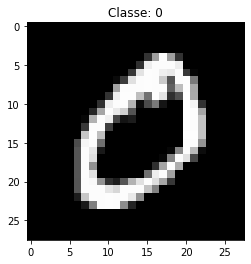

In [ ]:
plt.imshow(X_treinamento[1].reshape(28,28), cmap='gray')
plt.title('Classe: ' + str(y_treinamento[1]));

In [ ]:
X_treinamento.shape

(60000, 28, 28)

In [ ]:
28 * 28

784

In [ ]:
X_treinamento = X_treinamento.reshape(60000, 28 * 28)
X_treinamento.shape

(60000, 784)

In [ ]:
X_treinamento[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
X_teste.shape

(10000, 28, 28)

In [ ]:
X_teste = X_teste.reshape(10000, 28 * 28)
X_teste.shape

(10000, 784)

In [ ]:
y_treinamento, y_teste

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

# Pré-processamento das imagens

In [ ]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [ ]:
X_treinamento[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [ ]:
X_treinamento[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [ ]:
# Sigmoide - 0 e 1 (2 classes)
# Softmax (3 ou mais classes)

In [ ]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_treinamento = np_utils.to_categorical(y_treinamento)

In [ ]:
y_treinamento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_treinamento[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_treinamento[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_teste = np_utils.to_categorical(y_teste)
y_teste

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Arquitetura e treinamento da rede neural

In [ ]:
(784 + 10) / 2

397.0

In [ ]:
# 784 -> 397 -> 397 -> 10
rede_neural = Sequential()
rede_neural.add(Dense(input_shape = (784, ), units = 397, activation = 'relu'))
rede_neural.add(Dense(units = 397, activation = 'relu'))
rede_neural.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
historico = rede_neural.fit(X_treinamento, y_treinamento, batch_size = 128, epochs = 50)

Epoch 1/50
469/469 [==============================] - 5s 8ms/step - loss: 0.2322 - accuracy: 0.9328
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0843 - accuracy: 0.9739
Epoch 3/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0547 - accuracy: 0.9829
Epoch 4/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0369 - accuracy: 0.9880
Epoch 5/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0286 - accuracy: 0.9911
Epoch 6/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0235 - accuracy: 0.9922
Epoch 7/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0163 - accuracy: 0.9947
Epoch 8/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0161 - accuracy: 0.9947
Epoch 9/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0152 - accuracy: 0.9948
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0134 - accuracy: 0.9955

# Avaliação

In [ ]:
historico.history.keys()

dict_keys(['loss', 'accuracy'])

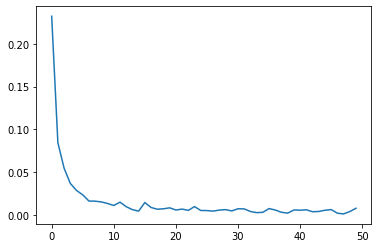

In [ ]:
plt.plot(historico.history['loss']);

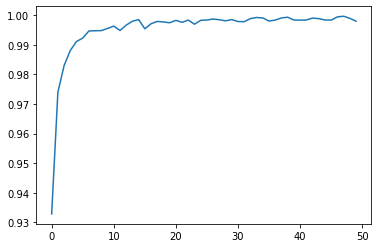

In [ ]:
plt.plot(historico.history['accuracy']);

In [ ]:
X_teste, X_teste.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), (10000, 784))

In [ ]:
rede_neural.evaluate(X_teste, y_teste)

313/313 [==============================] - 1s 2ms/step - loss: 0.1412 - accuracy: 0.9822


[0.14120441675186157, 0.982200026512146]

In [ ]:
previsoes = rede_neural.predict(X_teste)

In [ ]:
previsoes, previsoes.shape

(array([[6.5841782e-24, 3.4715800e-15, 3.0636991e-19, ..., 1.0000000e+00,
         2.0158002e-21, 3.2307709e-17],
        [8.2029281e-32, 2.0810318e-16, 1.0000000e+00, ..., 1.5485109e-23,
         3.1327471e-23, 8.4929219e-29],
        [3.3934705e-19, 1.0000000e+00, 6.6618360e-18, ..., 2.4858281e-16,
         9.2681080e-12, 1.5148933e-21],
        ...,
        [1.6033440e-23, 7.1623219e-22, 5.1993602e-32, ..., 1.1182376e-18,
         2.9746103e-18, 1.5890223e-16],
        [1.6462019e-29, 2.9660631e-28, 2.5209635e-29, ..., 5.4927084e-32,
         2.6672210e-15, 1.1638872e-27],
        [4.4620712e-30, 3.0978595e-36, 4.7358995e-38, ..., 0.0000000e+00,
         7.5305049e-24, 3.0279151e-33]], dtype=float32), (10000, 10))

In [ ]:
previsoes[0]

array([6.5841782e-24, 3.4715800e-15, 3.0636991e-19, 3.7881168e-19,
       2.2657000e-20, 3.4734966e-25, 5.8976663e-27, 1.0000000e+00,
       2.0158002e-21, 3.2307709e-17], dtype=float32)

In [ ]:
import numpy as np
np.argmax(y_teste[0])

7

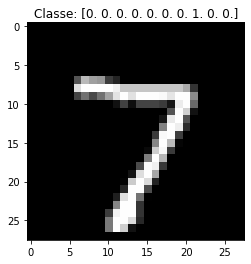

In [ ]:
plt.imshow(X_teste[0].reshape(28, 28), cmap='gray')
plt.title('Classe: ' + str(y_teste[0]));

# Classificação de uma única imagem

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
imagem_teste = cv2.imread('/content/digito.png')

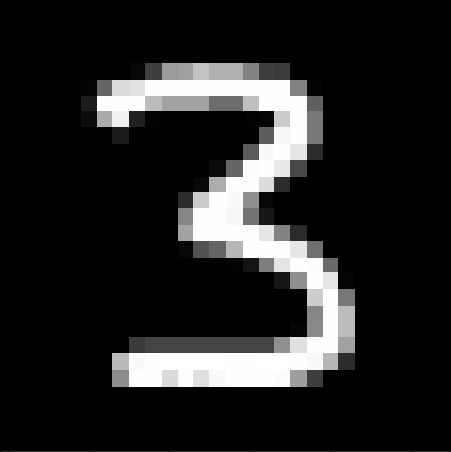

In [ ]:
cv2_imshow(imagem_teste)

In [ ]:
imagem_teste.shape

(452, 451, 3)

In [ ]:
imagem_teste = cv2.resize(imagem_teste, (28, 28))
imagem_teste.shape

(28, 28, 3)

In [ ]:
cv2_imshow(imagem_teste)

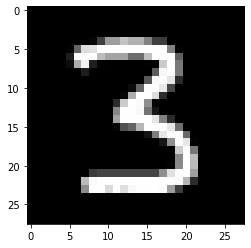

In [ ]:
plt.imshow(imagem_teste);

In [ ]:
imagem_teste = cv2.cvtColor(imagem_teste, cv2.COLOR_BGR2GRAY)
imagem_teste.shape

(28, 28)

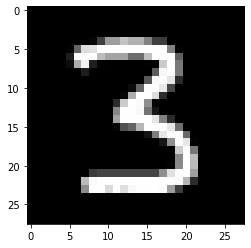

In [ ]:
plt.imshow(imagem_teste, cmap='gray');

In [ ]:
imagem_teste = imagem_teste.reshape(1, 28 * 28)
imagem_teste.shape

(1, 784)

In [ ]:
imagem_teste

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   6,  63, 156, 159, 195, 177, 177, 130,  63,  60,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   4, 101, 220, 225, 254, 254, 254, 254, 254, 254, 254,
        254, 253, 130,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  29, 254, 254, 254, 188

In [ ]:
imagem_teste = imagem_teste / 255
imagem_teste

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
previsao = rede_neural.predict(imagem_teste)

In [ ]:
previsao

array([[0.0000000e+00, 5.7820774e-33, 1.2239457e-30, 1.0000000e+00,
        0.0000000e+00, 1.1817120e-25, 0.0000000e+00, 2.1054446e-36,
        6.4199842e-25, 2.0291576e-26]], dtype=float32)

In [ ]:
np.argmax(previsao)

3